# Convolutional Neural Networks

<br>
The agenda for the AI field is to enable machines to view the world as humans do, perceive it in a similar manner and even use the knowledge for a multitude of tasks such as Image & Video recognition, Image Analysis & Classification, Media Recreation, Recommendation Systems, Natural Language Processing, etc. The advancements in Computer Vision with Deep Learning has been constructed and perfected with time, primarily over one particular algorithm — 
**Convolutional Neural Networks** .

<img src = "cnn_architecture.svg" height = 650 width = 650>[source](https://developers.google.com/machine-learning/practica/image-classification/convolutional-neural-networks)

A Convolutional Neural Network (ConvNet/CNN) is a Deep Learning algorithm which can take in an input image, assign importance (learnable weights and biases) to various aspects/objects in the image and be able to differentiate one from the other. The pre-processing required in a ConvNet is much lower as compared to other classification algorithms. While in primitive methods filters are hand-engineered, with enough training, ConvNets have the ability to learn these filters/characteristics.


**In this notebook we will train a CNN to classify images**

### 1. Load Cifar10 dataset

In [0]:
import keras
from keras.datasets import cifar10

# load the pre-shuffled train and test data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

### 2. Visualize training images

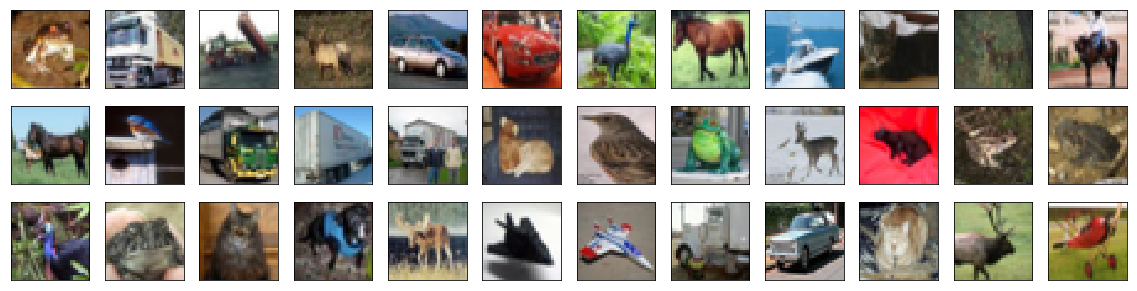

In [9]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(20,5))
for i in range(36):
    ax = fig.add_subplot(3, 12, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_train[i]))

### 3. Rescaling images

In [0]:
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

### 4. Breaking Dataset into Train and Test data

In [11]:
from keras.utils import np_utils

# one-hot encode the labels
num_classes = len(np.unique(y_train))
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# break training set into training and validation sets
(x_train, x_valid) = x_train[5000:], x_train[:5000]
(y_train, y_valid) = y_train[5000:], y_train[:5000]

# print shape of training set
print('x_train shape:', x_train.shape)

# print number of training, validation, and test images
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
print(x_valid.shape[0], 'validation samples')

x_train shape: (45000, 32, 32, 3)
45000 train samples
10000 test samples
5000 validation samples


### 5. Defining model architecture

In [36]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential()
model.add(Conv2D(filters=16, kernel_size=2, padding='same', activation='relu', 
                        input_shape=(32, 32, 3)))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_22 (Conv2D)           (None, 32, 32, 16)        208       
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 16, 16, 32)        2080      
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 8, 8, 64)          8256      
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 4, 4, 64)          0         
_________________________________________________________________
dropout_15 (Dropout)         (None, 4, 4, 64)         

### 6. Compile Model

In [0]:
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', 
                  metrics=['accuracy'])

### 7. Train model

In [38]:
from keras.callbacks import ModelCheckpoint   

# train the model
#checkpointer = ModelCheckpoint(filepath="/content/drive/My Drive/model.weights.best.hdf5", verbose=1, save_best_only=True)
hist = model.fit(x_train, y_train, batch_size=32, epochs=15,
          validation_data=(x_valid, y_valid), #callbacks=[checkpointer], 
          verbose=1, shuffle=True)

Train on 45000 samples, validate on 5000 samples
Epoch 1/15
45000/45000 [==============================] - 14s 309us/step - loss: 1.5837 - acc: 0.4265 - val_loss: 1.4830 - val_acc: 0.4652
Epoch 2/15
45000/45000 [==============================] - 13s 290us/step - loss: 1.2580 - acc: 0.5517 - val_loss: 1.1700 - val_acc: 0.5982
Epoch 3/15
45000/45000 [==============================] - 13s 290us/step - loss: 1.1304 - acc: 0.6003 - val_loss: 1.1702 - val_acc: 0.5872
Epoch 4/15
45000/45000 [==============================] - 13s 286us/step - loss: 1.0663 - acc: 0.6260 - val_loss: 0.9766 - val_acc: 0.6626
Epoch 5/15
45000/45000 [==============================] - 13s 284us/step - loss: 1.0335 - acc: 0.6396 - val_loss: 1.0190 - val_acc: 0.6372
Epoch 6/15
45000/45000 [==============================] - 13s 289us/step - loss: 1.0087 - acc: 0.6530 - val_loss: 1.1306 - val_acc: 0.6330
Epoch 7/15
45000/45000 [==============================] - 13s 287us/step - loss: 1.0025 - acc: 0.6569 - val_loss: 1.1

### 8. Load model with best accuracy

In [0]:
model.load_weights('model.weights.best.hdf5')

### 9. Calculate accuracy

In [39]:
score = model.evaluate(x_test, y_test, verbose=0)
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.635


### 10. Visualising predictions

In [0]:
y_hat = model.predict(x_test)

# define text labels (source: https://www.cs.toronto.edu/~kriz/cifar.html)
cifar10_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

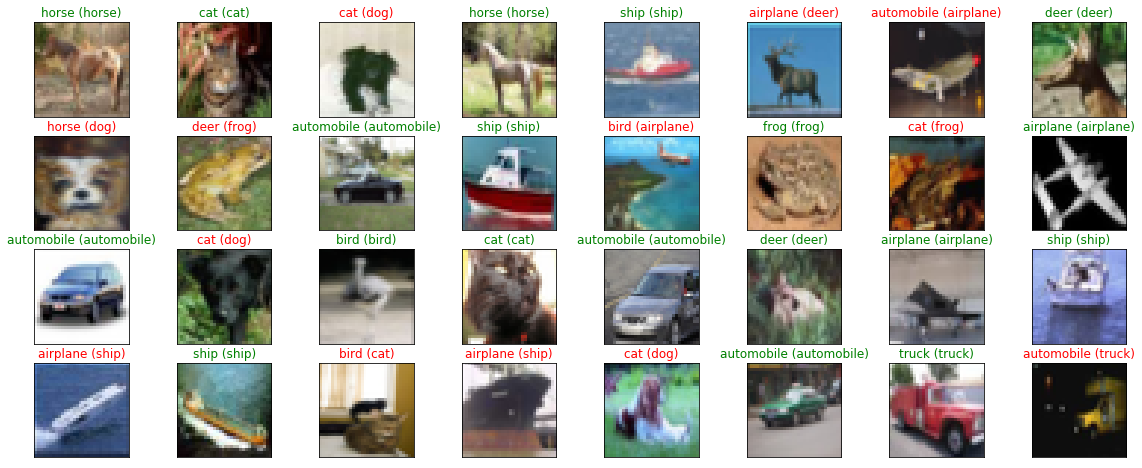

In [41]:
fig = plt.figure(figsize=(20, 8))
for i, idx in enumerate(np.random.choice(x_test.shape[0], size=32, replace=False)):
    ax = fig.add_subplot(4, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_test[idx]))
    pred_idx = np.argmax(y_hat[idx])
    true_idx = np.argmax(y_test[idx])
    ax.set_title("{} ({})".format(cifar10_labels[pred_idx], cifar10_labels[true_idx]),
                 color=("green" if pred_idx == true_idx else "red"))